Accuracy: 0.8055555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.93      0.93      0.93        14
           2       0.56      0.62      0.59         8

    accuracy                           0.81        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.81      0.81      0.81        36


Class Probabilities (First 5 Samples):
Sample 1: [0.39202303 0.04158128 0.56639569] --> Predicted Class: 2
Sample 2: [0.0449127  0.00457915 0.95050815] --> Predicted Class: 2
Sample 3: [0.15589793 0.34725345 0.49684862] --> Predicted Class: 2
Sample 4: [0.89725655 0.02591453 0.07682891] --> Predicted Class: 0
Sample 5: [0.02085896 0.92791143 0.05122962] --> Predicted Class: 1


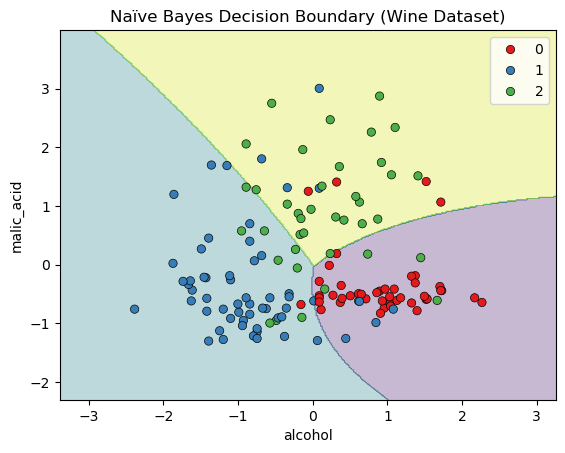

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load Wine dataset
wine = datasets.load_wine()
X = wine.data[:, :2]  # Taking first two features for visualization
y = wine.target       # Multiclass labels (3 classes)

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)
probabilities = nb_model.predict_proba(X_test)  # Get class probabilities

# Print Accuracy & Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Probabilities for First 5 Test Samples
print("\nClass Probabilities (First 5 Samples):")
for i in range(5):
    print(f"Sample {i+1}: {probabilities[i]} --> Predicted Class: {y_pred[i]}")

# Decision Boundary Visualization
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.title("Naïve Bayes Decision Boundary (Wine Dataset)")
    plt.legend()
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, nb_model)
